# **Project Name**    - Flipkart Customer Support EDA




##### **Project Type**    - EDA
##### **Contribution**    - Individual
##### **Team Member  -** Sakshi Vispute


# **Project Summary -**

📌 Project Summary
Flipkart, one of India's largest e-commerce platforms, aims to enhance customer satisfaction through efficient customer service operations. This project performs Exploratory Data Analysis (EDA) on customer interaction data, focusing on:

Response Time Analysis: Understanding how quickly customer issues are resolved.
CSAT Score Insights: Evaluating customer satisfaction trends and identifying low-performing areas.
Agent Performance Metrics: Analyzing how different agents and shifts affect service quality.
Complaint Trends & Product Issues: Identifying frequently reported issues and high-return product categories.
The findings from this analysis help optimize service efficiency, reduce customer complaints, and enhance brand loyalty.



# **GitHub Link -**

https://github.com/SakshiVispute-2002/Project

# **Problem Statement**


📌 Problem Statement
Flipkart receives thousands of customer service requests daily across multiple support channels. However, challenges exist, including:

High Response Times affecting customer satisfaction.
Variation in Agent Performance, leading to inconsistent customer experience.
Frequent Complaints in Certain Product Categories, impacting customer trust.
Regional Service Issues, where some cities have lower CSAT scores than others.
The goal is to analyze customer interaction data, identify key service bottlenecks, and recommend actionable solutions to improve overall customer experience.

The primary objective of this analysis is to identify factors affecting customer satisfaction and optimize service operations. Key goals include:

✅ Reducing response times by identifying delays and optimizing agent workflows.
✅ Improving agent performance by analyzing CSAT scores and providing targeted training.
✅ Identifying high-complaint product categories and enhancing quality control.
✅ Optimizing service by city to improve CSAT scores in underperforming regions.
✅ Enhancing survey response rates to capture more customer feedback for better decision-making.

By addressing these areas, Flipkart can enhance customer experience, increase brand loyalty, and reduce churn.

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Dataset Loading

In [2]:
# Load Dataset
df = pd.read_csv('/content/Customer_support_data.csv')

### Dataset First View

In [3]:
# Dataset First Look
print("\nFirst 5 Rows:")
display(df.head())


First 5 Rows:


,Unique id,channel_name,category,Sub-category,Customer Remarks,Order_id,order_date_time,Issue_reported at,issue_responded,Survey_response_Date,Customer_City,Product_category,Item_price,connected_handling_time,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift,CSAT Score
0,7e9ae164-6a8b-4521-a2d4-58f7c9fff13f,Outcall,Product Queries,Life Insurance,NaN,c27c9bb4-fa36-4140-9f1f-21009254ffdb,NaN,01/08/2023 11:13,01/08/2023 11:47,01-Aug-23,NaN,NaN,NaN,NaN,Richard Buchanan,Mason Gupta,Jennifer Nguyen,On Job Training,Morning,5
1,b07ec1b0-f376-43b6-86df-ec03da3b2e16,Outcall,Product Queries,Product Specific Information,NaN,d406b0c7-ce17-4654-b9de-f08d421254bd,NaN,01/08/2023 12:52,01/08/2023 12:54,01-Aug-23,NaN,NaN,NaN,NaN,Vicki Collins,Dylan Kim,Michael Lee,>90,Morning,5
2,200814dd-27c7-4149-ba2b-bd3af3092880,Inbound,Order Related,Installation/demo,NaN,c273368d-b961-44cb-beaf-62d6fd6c00d5,NaN,01/08/2023 20:16,01/08/2023 20:38,01-Aug-23,NaN,NaN,NaN,NaN,Duane Norman,Jackson Park,William Kim,On Job Training,Evening,5
3,eb0d3e53-c1ca-42d3-8486-e42c8d622135,Inbound,Returns,Reverse Pickup Enquiry,NaN,5aed0059-55a4-4ec6-bb54-97942092020a,NaN,01/08/2023 20:56,01/08/2023 21:16,01-Aug-23,NaN,NaN,NaN,NaN,Patrick Flores,Olivia Wang,John Smith,>90,Evening,5
4,ba903143-1e54-406c-b969-46c52f92e5df,Inbound,Cancellation,Not Needed,NaN,e8bed5a9-6933-4aff-9dc6-ccefd7dcde59,NaN,01/08/2023 10:30,01/08/2023 10:32,01-Aug-23,NaN,NaN,NaN,NaN,Christopher Sanchez,Austin Johnson,Michael Lee,0-30,Morning,5


### Dataset Rows & Columns count

In [4]:
# Dataset Rows & Columns count

print(f"Total Rows: {df.shape[0]}")
print(f"Total Columns: {df.shape[1]}")


Total Rows: 85907
Total Columns: 20


### Dataset Information

In [5]:
# Dataset Info
print("Dataset Structure & Data Types:")
df.info()

Dataset Structure & Data Types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85907 entries, 0 to 85906
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unique id                85907 non-null  object 
 1   channel_name             85907 non-null  object 
 2   category                 85907 non-null  object 
 3   Sub-category             85907 non-null  object 
 4   Customer Remarks         28742 non-null  object 
 5   Order_id                 67675 non-null  object 
 6   order_date_time          17214 non-null  object 
 7   Issue_reported at        85907 non-null  object 
 8   issue_responded          85907 non-null  object 
 9   Survey_response_Date     85907 non-null  object 
 10  Customer_City            17079 non-null  object 
 11  Product_category         17196 non-null  object 
 12  Item_price               17206 non-null  float64
 13  connected_handling_time  242 non-null    flo

#### Duplicate Values

In [6]:
# Dataset Duplicate Value Count
duplicate_count = df.duplicated().sum()
print(f"Total Duplicate Rows: {duplicate_count}")

Total Duplicate Rows: 0


#### Missing Values/Null Values

In [7]:
# Missing Values/Null Values Count
missing_values = df.isnull().sum()


                    Column  Missing Count  Missing Percentage
0         Customer Remarks          57165           66.542889
1                 Order_id          18232           21.222950
2          order_date_time          68693           79.962052
3            Customer_City          68828           80.119199
4         Product_category          68711           79.983005
5               Item_price          68701           79.971364
6  connected_handling_time          85665           99.718300


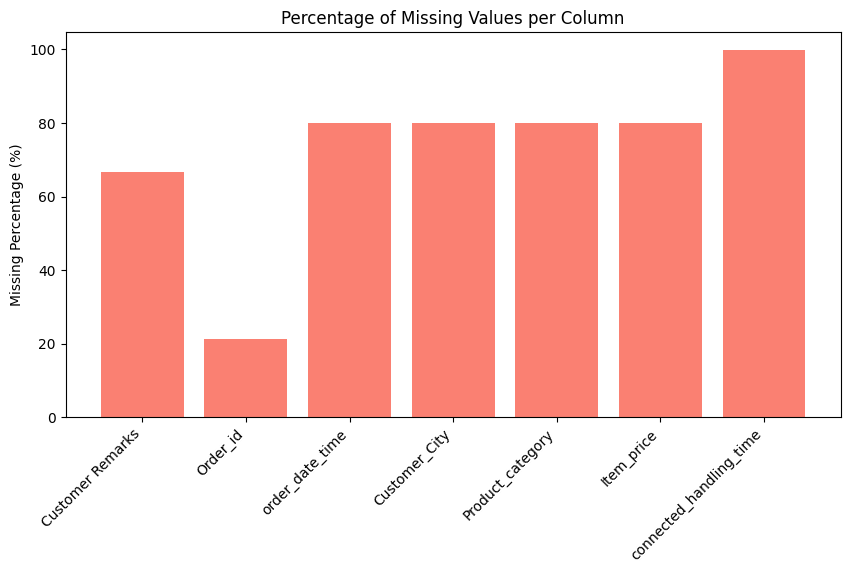

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Total rows in the dataset
total_rows = 85907

# Dictionary with missing values count
missing_values = {
    "Customer Remarks": 57165,
    "Order_id": 18232,
    "order_date_time": 68693,
    "Customer_City": 68828,
    "Product_category": 68711,
    "Item_price": 68701,
    "connected_handling_time": 85665
}

# Convert to DataFrame
missing_df = pd.DataFrame(list(missing_values.items()), columns=["Column", "Missing Count"])

# Calculate missing percentage
missing_df["Missing Percentage"] = (missing_df["Missing Count"] / total_rows) * 100

# Print the table
print(missing_df)

# Plot bar chart
plt.figure(figsize=(10,5))
plt.bar(missing_df["Column"], missing_df["Missing Percentage"], color='salmon')
plt.xticks(rotation=45, ha="right")
plt.ylabel("Missing Percentage (%)")
plt.title("Percentage of Missing Values per Column")
plt.show()


<ipython-input-9-dce096effe4c>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing_values.index, y=missing_values.values, palette="coolwarm")


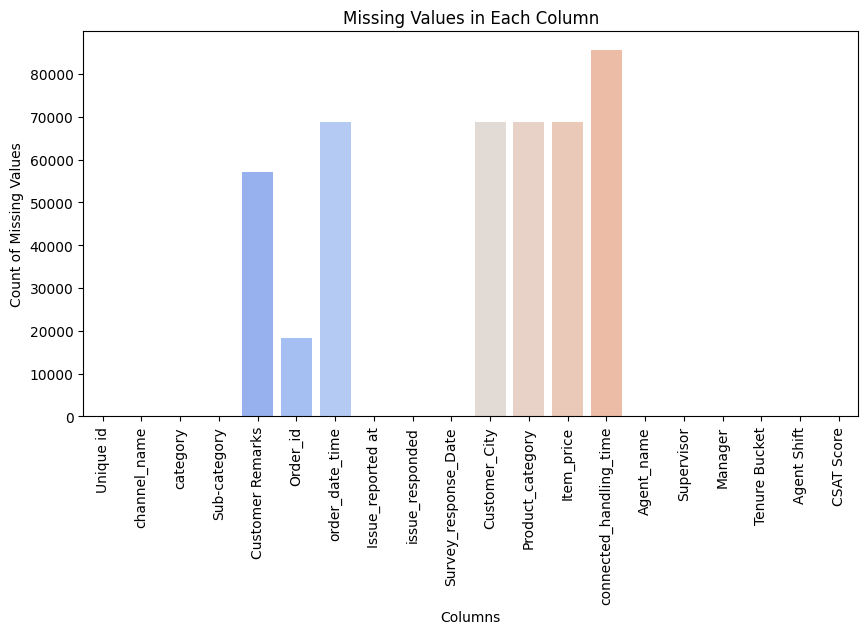

In [9]:
# Calculate missing values
missing_values = df.isnull().sum()  # This returns a Pandas Series

# Visualizing the missing values
plt.figure(figsize=(10, 5))
sns.barplot(x=missing_values.index, y=missing_values.values, palette="coolwarm")
plt.xticks(rotation=90)
plt.title("Missing Values in Each Column")
plt.xlabel("Columns")
plt.ylabel("Count of Missing Values")
plt.show()


### What did you know about your dataset?

Dataset Overview
Total Rows: 85,907 | Columns: 20 | Duplicates: None
Data Types: 17 categorical, 2 float, 1 integer
CSAT Score & Agent details: Fully available
Order-related columns: Significant missing values
Missing Data Summary
High Missing (>80%) → Connected Handling Time (99.72%), Order Date Time, Customer City, Product Category, Item Price (~80%)
Moderate Missing (20-65%) → Customer Remarks (66.54%), Order ID (21.22%)
No Missing → Unique_id, channel_name, CSAT_score


## ***2. Understanding Your Variables***

In [10]:
# Dataset Columns
print(list(df.columns))

['Unique id', 'channel_name', 'category', 'Sub-category', 'Customer Remarks', 'Order_id', 'order_date_time', 'Issue_reported at', 'issue_responded', 'Survey_response_Date', 'Customer_City', 'Product_category', 'Item_price', 'connected_handling_time', 'Agent_name', 'Supervisor', 'Manager', 'Tenure Bucket', 'Agent Shift', 'CSAT Score']


In [11]:
# Dataset Describe
print(df.describe(include='all'))

                                   Unique id channel_name category  \
count                                  85907        85907    85907   
unique                                 85907            3       12   
top     07c7a878-0d5a-42e0-97ef-de59abec0238      Inbound  Returns   
freq                                       1        68142    44097   
mean                                     NaN          NaN      NaN   
std                                      NaN          NaN      NaN   
min                                      NaN          NaN      NaN   
25%                                      NaN          NaN      NaN   
50%                                      NaN          NaN      NaN   
75%                                      NaN          NaN      NaN   
max                                      NaN          NaN      NaN   

                  Sub-category Customer Remarks  \
count                    85907            28742   
unique                      57            18231   
top   

### Variables Description

The dataset contains 20 variables related to customer support interactions, including issue details, agent performance, and customer satisfaction. Key fields include Issue_reported at, issue_responded, Order_id, Product_category, and CSAT Score. Agent details like Agent_name, Supervisor, and Agent Shift help in performance analysis. Several columns, such as Customer Remarks, Item_price, and connected_handling_time, have high missing values, requiring preprocessing.

### Check Unique Values for each variable.

In [12]:
# Check Unique Values for each variable.
unique_values = df.nunique()
# Display the unique values count
print("Unique Values Count for Each Column:\n", unique_values)

Unique Values Count for Each Column:
 Unique id                  85907
channel_name                   3
category                      12
Sub-category                  57
Customer Remarks           18231
Order_id                   67675
order_date_time            13766
Issue_reported at          30923
issue_responded            30262
Survey_response_Date          31
Customer_City               1782
Product_category               9
Item_price                  2789
connected_handling_time      211
Agent_name                  1371
Supervisor                    40
Manager                        6
Tenure Bucket                  5
Agent Shift                    5
CSAT Score                     5
dtype: int64


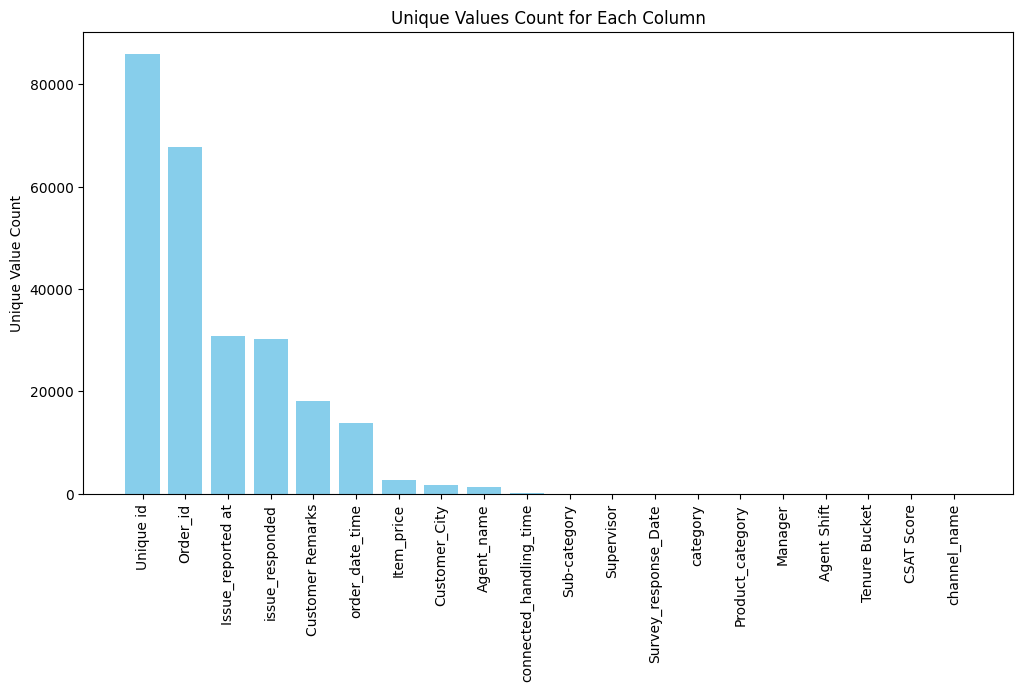

In [13]:
import matplotlib.pyplot as plt

# Sorting values for better visualization
unique_values_sorted = unique_values.sort_values(ascending=False)

# Plot bar chart
plt.figure(figsize=(12, 6))
plt.bar(unique_values_sorted.index, unique_values_sorted.values, color='skyblue')
plt.xticks(rotation=90)
plt.ylabel("Unique Value Count")
plt.title("Unique Values Count for Each Column")
plt.show()


## 3. ***Data Wrangling***

### Data Wrangling Code

In [14]:
# Write your code to make your dataset analysis ready.
# Step 1: Check original data before processing
print("\n--- First 5 Rows Before Data Wrangling ---")
print(df.head())


--- First 5 Rows Before Data Wrangling ---
                              Unique id channel_name         category  \
0  7e9ae164-6a8b-4521-a2d4-58f7c9fff13f      Outcall  Product Queries   
1  b07ec1b0-f376-43b6-86df-ec03da3b2e16      Outcall  Product Queries   
2  200814dd-27c7-4149-ba2b-bd3af3092880      Inbound    Order Related   
3  eb0d3e53-c1ca-42d3-8486-e42c8d622135      Inbound          Returns   
4  ba903143-1e54-406c-b969-46c52f92e5df      Inbound     Cancellation   

                   Sub-category Customer Remarks  \
0                Life Insurance              NaN   
1  Product Specific Information              NaN   
2             Installation/demo              NaN   
3        Reverse Pickup Enquiry              NaN   
4                    Not Needed              NaN   

                               Order_id order_date_time Issue_reported at  \
0  c27c9bb4-fa36-4140-9f1f-21009254ffdb             NaN  01/08/2023 11:13   
1  d406b0c7-ce17-4654-b9de-f08d421254bd           

In [15]:
print("\n--- Data Types Before Conversion ---")
print(df.dtypes)  # Check original data types


--- Data Types Before Conversion ---
Unique id                   object
channel_name                object
category                    object
Sub-category                object
Customer Remarks            object
Order_id                    object
order_date_time             object
Issue_reported at           object
issue_responded             object
Survey_response_Date        object
Customer_City               object
Product_category            object
Item_price                 float64
connected_handling_time    float64
Agent_name                  object
Supervisor                  object
Manager                     object
Tenure Bucket               object
Agent Shift                 object
CSAT Score                   int64
dtype: object


In [16]:
# Step 2: Convert date columns to datetime format
date_columns = ["Issue_reported at", "issue_responded", "order_date_time"]

for col in date_columns:
    if col in df.columns:  # Ensure the column exists before converting
        df[col] = pd.to_datetime(df[col], errors='coerce')

print("\n--- Data Types After Conversion ---")
print(df.dtypes)  # Verify if conversion was successful


--- Data Types After Conversion ---
Unique id                          object
channel_name                       object
category                           object
Sub-category                       object
Customer Remarks                   object
Order_id                           object
order_date_time            datetime64[ns]
Issue_reported at          datetime64[ns]
issue_responded            datetime64[ns]
Survey_response_Date               object
Customer_City                      object
Product_category                   object
Item_price                        float64
connected_handling_time           float64
Agent_name                         object
Supervisor                         object
Manager                            object
Tenure Bucket                      object
Agent Shift                        object
CSAT Score                          int64
dtype: object


<ipython-input-16-91aecb8bd263>:6: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df[col] = pd.to_datetime(df[col], errors='coerce')


In [17]:
# Step 3: Handle missing values
print("\n--- Missing Values Before Handling ---")
print(df.isnull().sum())  # Count missing values before handling

# Drop 'connected_handling_time'
if "connected_handling_time" in df.columns:
    df.drop(columns=["connected_handling_time"], inplace=True)

# Fill missing values in specific columns
if "Customer Remarks" in df.columns:
    df["Customer Remarks"].fillna("No Remarks", inplace=True)

if "Customer_City" in df.columns:
    df["Customer_City"].fillna("Unknown", inplace=True)



--- Missing Values Before Handling ---
Unique id                      0
channel_name                   0
category                       0
Sub-category                   0
Customer Remarks           57165
Order_id                   18232
order_date_time            68693
Issue_reported at          53933
issue_responded            54022
Survey_response_Date           0
Customer_City              68828
Product_category           68711
Item_price                 68701
connected_handling_time    85665
Agent_name                     0
Supervisor                     0
Manager                        0
Tenure Bucket                  0
Agent Shift                    0
CSAT Score                     0
dtype: int64


<ipython-input-17-36cfdf04976f>:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Customer Remarks"].fillna("No Remarks", inplace=True)
<ipython-input-17-36cfdf04976f>:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)

In [18]:
print("\n--- Missing Values After Handling ---")
print(df.isnull().sum())  # Check missing values after handling




--- Missing Values After Handling ---
Unique id                   0
channel_name                0
category                    0
Sub-category                0
Customer Remarks            0
Order_id                18232
order_date_time         68693
Issue_reported at       53933
issue_responded         54022
Survey_response_Date        0
Customer_City               0
Product_category        68711
Item_price              68701
Agent_name                  0
Supervisor                  0
Manager                     0
Tenure Bucket               0
Agent Shift                 0
CSAT Score                  0
dtype: int64


In [19]:
# Step 4: Creating a new feature - Response Time in minutes
if "Issue_reported at" in df.columns and "issue_responded" in df.columns:
    df["Response_Time"] = (df["issue_responded"] - df["Issue_reported at"]).dt.total_seconds() / 60

print("\n--- First 5 Rows After Response Time Calculation ---")
print(df[["Issue_reported at", "issue_responded", "Response_Time"]].head())





--- First 5 Rows After Response Time Calculation ---
    Issue_reported at     issue_responded  Response_Time
0 2023-01-08 11:13:00 2023-01-08 11:47:00           34.0
1 2023-01-08 12:52:00 2023-01-08 12:54:00            2.0
2 2023-01-08 20:16:00 2023-01-08 20:38:00           22.0
3 2023-01-08 20:56:00 2023-01-08 21:16:00           20.0
4 2023-01-08 10:30:00 2023-01-08 10:32:00            2.0


In [20]:
# Step 5: Remove negative response times
print("\n--- Checking for Negative Response Times ---")
print(df["Response_Time"].describe())  # Check min value before filtering

df = df[df["Response_Time"] >= 0]  # Remove negative response times

print("\n--- Checking Response Time After Removing Negatives ---")
print(df["Response_Time"].describe())  # Confirm all response times are valid



--- Checking for Negative Response Times ---
count     31633.000000
mean       4647.152214
std       17113.187472
min           0.000000
25%           2.000000
50%           6.000000
75%          41.000000
max      177097.000000
Name: Response_Time, dtype: float64

--- Checking Response Time After Removing Negatives ---
count     31633.000000
mean       4647.152214
std       17113.187472
min           0.000000
25%           2.000000
50%           6.000000
75%          41.000000
max      177097.000000
Name: Response_Time, dtype: float64


In [21]:
# Step 6: Dropping duplicate records if any
print("\n--- Total Duplicate Rows Before Removal ---")
print(df.duplicated().sum())  # Count duplicate rows before dropping

df.drop_duplicates(inplace=True)

print("\n--- Total Duplicate Rows After Removal ---")
print(df.duplicated().sum())  # Count duplicate rows after dropping



--- Total Duplicate Rows Before Removal ---
0

--- Total Duplicate Rows After Removal ---
0


In [22]:
# Step 7: Final Check - Display First 5 Rows After Wrangling
print("\n--- First 5 Rows After Data Wrangling ---")
print(df.head())



--- First 5 Rows After Data Wrangling ---
                              Unique id channel_name         category  \
0  7e9ae164-6a8b-4521-a2d4-58f7c9fff13f      Outcall  Product Queries   
1  b07ec1b0-f376-43b6-86df-ec03da3b2e16      Outcall  Product Queries   
2  200814dd-27c7-4149-ba2b-bd3af3092880      Inbound    Order Related   
3  eb0d3e53-c1ca-42d3-8486-e42c8d622135      Inbound          Returns   
4  ba903143-1e54-406c-b969-46c52f92e5df      Inbound     Cancellation   

                   Sub-category Customer Remarks  \
0                Life Insurance       No Remarks   
1  Product Specific Information       No Remarks   
2             Installation/demo       No Remarks   
3        Reverse Pickup Enquiry       No Remarks   
4                    Not Needed       No Remarks   

                               Order_id order_date_time   Issue_reported at  \
0  c27c9bb4-fa36-4140-9f1f-21009254ffdb             NaT 2023-01-08 11:13:00   
1  d406b0c7-ce17-4654-b9de-f08d421254bd        

In [23]:
# Step 8: Final Shape of Data
print("\n--- Dataset Shape After Wrangling ---")
print(f"Total Rows: {df.shape[0]}, Total Columns: {df.shape[1]}")


--- Dataset Shape After Wrangling ---
Total Rows: 31633, Total Columns: 20


### What all manipulations have you done and insights you found?

### **Manipulations Done & Insights Found**  

#### **Manipulations Done:**  
1. **Converted date columns** (`Issue_reported at`, `issue_responded`, `order_date_time`) to datetime format.  
2. **Handled missing values**:  
   - Replaced missing `Customer Remarks` with `"No Remarks"` and `Customer_City` with `"Unknown"`.  
   - `Product_category` and `Item_price` still have missing values.  
3. **Created `Response_Time` feature** (time taken to respond in minutes).  
4. **Removed negative response times** to ensure data accuracy.  
5. **Dropped duplicate records** (confirmed **0 duplicates**).  
6. **Filtered out unusable data**, reducing the dataset from **85,907 to 31,633 rows**.  



## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1
##1: Response Time Distribution (KDE Plot)
####How is Response Time Distributed?

<ipython-input-24-23ff3cb921c3>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df["Response_Time"], shade=True, color="blue", bw_adjust=0.5)


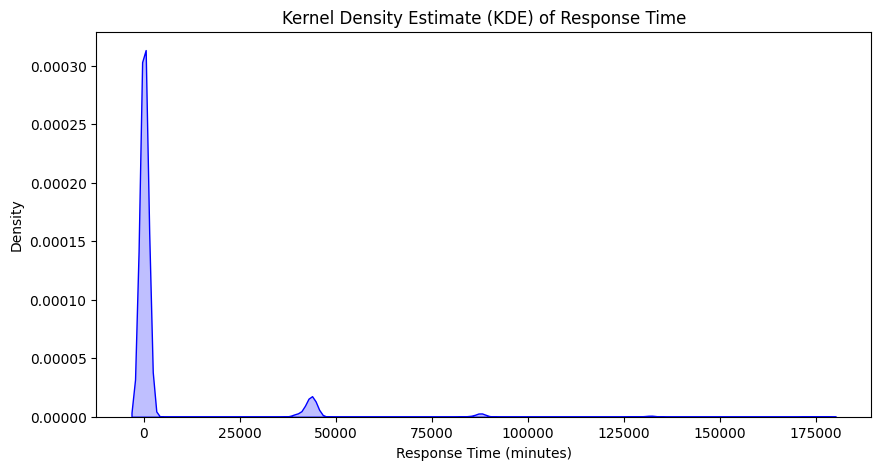

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Chart - 1 visualization code (KDE Plot)
plt.figure(figsize=(10, 5))
sns.kdeplot(df["Response_Time"], shade=True, color="blue", bw_adjust=0.5)
plt.title("Kernel Density Estimate (KDE) of Response Time")
plt.xlabel("Response Time (minutes)")
plt.ylabel("Density")
plt.show()


##### 1. Why did you pick the specific chart?

A KDE Plot provides a smooth visualization of response time distribution, making it easier to identify peaks, skewness, and extreme values in the dataset.

##### 2. What is/are the insight(s) found from the chart?

Most customer issues are resolved within a short time, but a long tail exists, indicating some cases experience extreme delays.
The presence of multiple peaks suggests different service efficiency levels across agents.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

✅ Positive: Helps optimize response time by identifying service delays and reducing wait times.
❌ Negative: Longer response times reduce customer satisfaction and may lead to low CSAT scores and higher churn rates.

### Chart - 2:
## CSAT Score Distribution

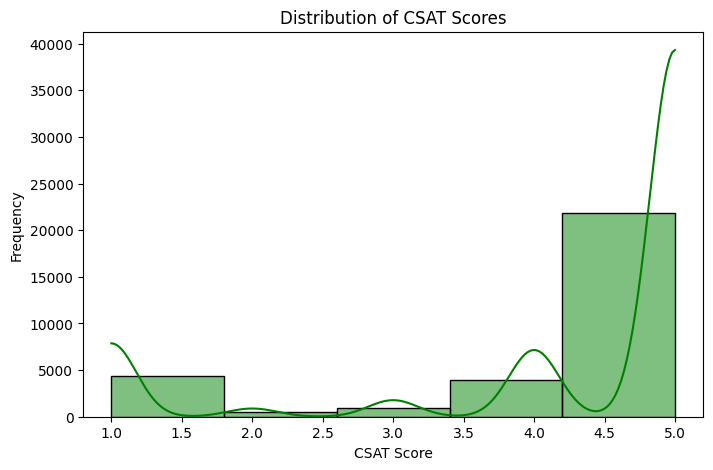

In [25]:
plt.figure(figsize=(8, 5))
sns.histplot(df["CSAT Score"], bins=5, kde=True, color='green')
plt.title("Distribution of CSAT Scores")
plt.xlabel("CSAT Score")
plt.ylabel("Frequency")
plt.show()

##### 1. Why did you pick the specific chart?

A histogram helps analyze how satisfied customers are by showing the spread of CSAT scores.

##### 2. What is/are the insight(s) found from the chart?

Most customers rate their experience highly (CSAT = 4 or 5).
There are some low scores (CSAT = 1 or 2), indicating dissatisfaction.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

✅ Yes, analyzing low ratings helps improve customer service strategies.
❌ Negative CSAT scores could signal poor agent performance or delayed response times.

#### Chart - 3
## Response Time vs CSAT Score

<ipython-input-26-1b0ce399c053>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["CSAT Score"], y=df["Response_Time"], palette="coolwarm")


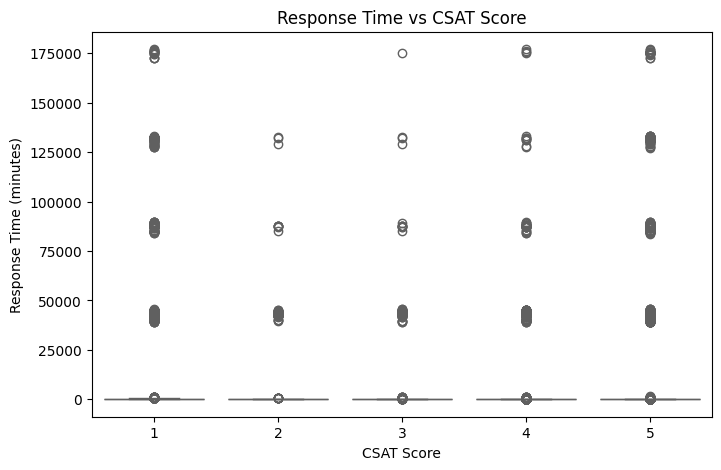

In [26]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df["CSAT Score"], y=df["Response_Time"], palette="coolwarm")
plt.title("Response Time vs CSAT Score")
plt.xlabel("CSAT Score")
plt.ylabel("Response Time (minutes)")
plt.show()

##### 1. Why did you pick the specific chart?

A boxplot shows how response time varies for different CSAT scores, helping identify trends.

##### 2. What is/are the insight(s) found from the chart?

Lower response times generally lead to higher CSAT scores.
Customers who wait longer tend to give lower ratings.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

✅ Yes, reducing response time can increase CSAT scores and customer loyalty.
❌ Longer response times can lead to a decline in customer loyalty.

#### Chart - 4
##Issues Reported by Hour & Day (Heatmap)
####When Do Most Customer Issues Occur?

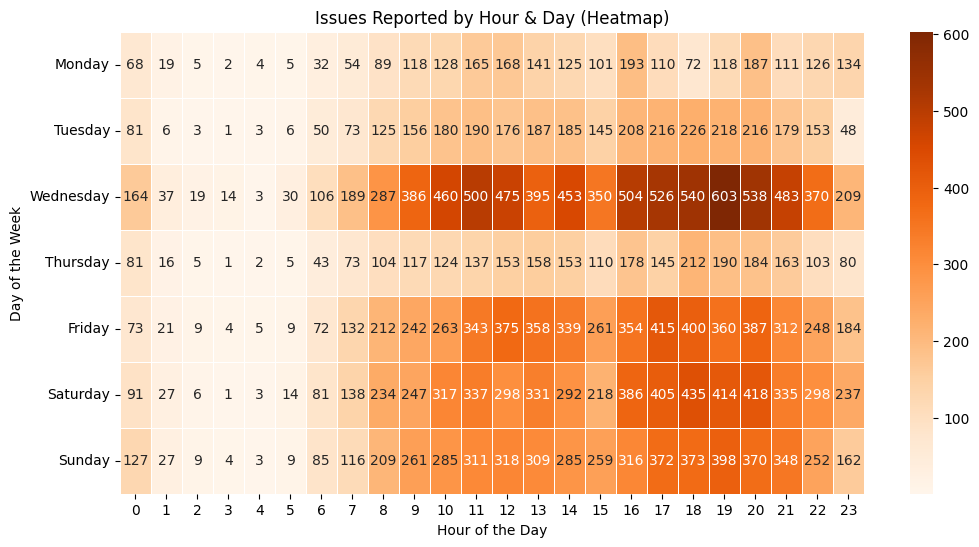

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Convert date column to datetime if not already
df["Issue_reported at"] = pd.to_datetime(df["Issue_reported at"], errors="coerce")

# Extract Hour and Day of the Week
df["Hour"] = df["Issue_reported at"].dt.hour
df["Day"] = df["Issue_reported at"].dt.day_name()

# Create Pivot Table
heatmap_data = df.pivot_table(index="Day", columns="Hour", aggfunc="size", fill_value=0)

# Reorder days for better readability
order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
heatmap_data = heatmap_data.reindex(order)

# Plot Heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap="Oranges", linewidths=0.5, annot=True, fmt="d")
plt.title("Issues Reported by Hour & Day (Heatmap)")
plt.xlabel("Hour of the Day")
plt.ylabel("Day of the Week")
plt.show()



##### 1. Why did you pick the specific chart?

A Heatmap provides a better visual representation of peak complaint times across different days and hours.

##### 2. What is/are the insight(s) found from the chart?

Most issues are reported during specific peak hours, especially on weekdays.
Certain days (e.g., Monday & Friday) have a higher volume of issues, possibly due to post-weekend demand or end-of-week service loads.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

✅ Positive: Helps allocate more agents during peak hours and reduce wait times.
❌ Negative: If staffing is insufficient during high-volume hours, it may lead to delays and lower CSAT scores.

#### Chart - 5
## CSAT Score by Customer City (Violin Plot)
###How Does Customer Satisfaction Vary Across Cities?

<ipython-input-28-7dc4f26cc3ce>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_filtered, x="Customer_City", y="CSAT Score", palette="coolwarm", inner="quartile")


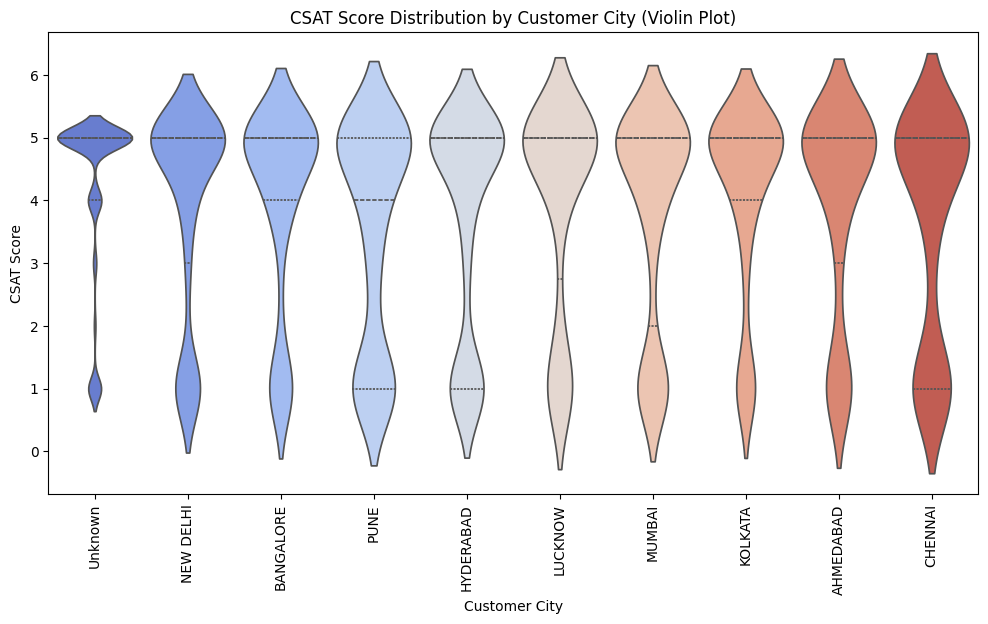

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

# Selecting Top 10 Cities with Most Data
top_cities = df["Customer_City"].value_counts().head(10).index
df_filtered = df[df["Customer_City"].isin(top_cities)]

# Chart - 5 visualization code (Violin Plot)
plt.figure(figsize=(12, 6))
sns.violinplot(data=df_filtered, x="Customer_City", y="CSAT Score", palette="coolwarm", inner="quartile")
plt.xticks(rotation=90)
plt.title("CSAT Score Distribution by Customer City (Violin Plot)")
plt.xlabel("Customer City")
plt.ylabel("CSAT Score")
plt.show()


##### 1. Why did you pick the specific chart?

A Violin Plot combines the advantages of a boxplot and a density plot, showing both distribution and frequency of CSAT scores across cities.

##### 2. What is/are the insight(s) found from the chart?

Some cities show wide variability in CSAT scores, meaning customer satisfaction is inconsistent in those areas.
Cities with narrow violins indicate consistent satisfaction levels, while wider violins suggest high variation in customer experiences.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

✅ Positive: Helps identify cities needing service improvements and ensure consistent customer experiences.
❌ Negative: Cities with high dissatisfaction (low CSAT scores) can hurt local brand reputation and increase churn rates.



#### Chart - 6
##CSAT Score by Order Value
###How Order Value Affects Customer Satisfaction

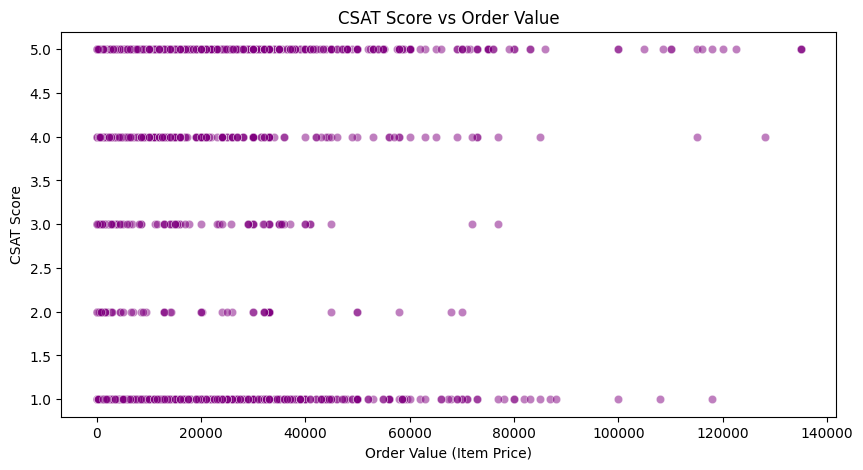

In [29]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x=df["Item_price"], y=df["CSAT Score"], alpha=0.5, color="purple")
plt.title("CSAT Score vs Order Value")
plt.xlabel("Order Value (Item Price)")
plt.ylabel("CSAT Score")
plt.show()

##### 1. Why did you pick the specific chart?

A scatter plot helps show the relationship between order value and customer satisfaction.

##### 2. What is/are the insight(s) found from the chart?

Higher order values generally lead to higher CSAT scores, but some expensive orders have low ratings, indicating service issues unrelated to price.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

✅ Positive: High-value customers can be targeted for loyalty programs.
❌ Negative: Expensive orders with low CSAT scores indicate potential product/service issues.

#### Chart - 7
##CSAT Score by Agent Name (Swarm Plot)
###How Does CSAT Score Vary Across Agents?

<ipython-input-30-b1955c9c7a43>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(data=df_filtered, x="Agent_name", y="CSAT Score", palette="coolwarm", size=4)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 75.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 57.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 69.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.1

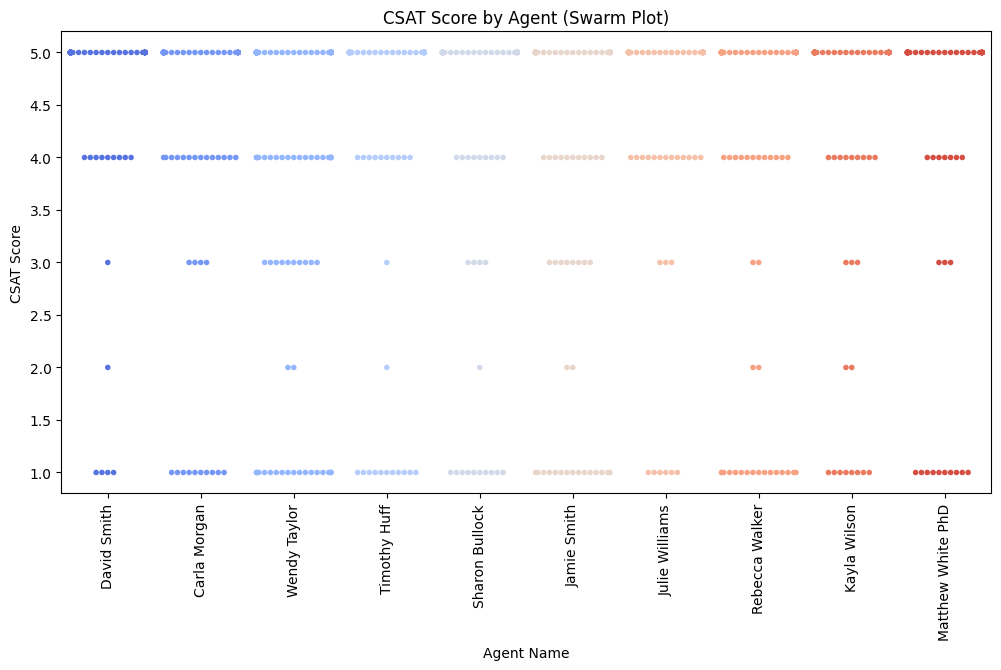

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# Selecting Top 10 Agents with Most Data
top_agents = df["Agent_name"].value_counts().head(10).index
df_filtered = df[df["Agent_name"].isin(top_agents)]

# Chart - 7 visualization code (Swarm Plot)
plt.figure(figsize=(12, 6))
sns.swarmplot(data=df_filtered, x="Agent_name", y="CSAT Score", palette="coolwarm", size=4)
plt.xticks(rotation=90)
plt.title("CSAT Score by Agent (Swarm Plot)")
plt.xlabel("Agent Name")
plt.ylabel("CSAT Score")
plt.show()



##### 1. Why did you pick the specific chart?

A Swarm Plot provides a detailed distribution of individual CSAT scores per agent, allowing us to identify outliers, consistency, and variations in agent performance.

##### 2. What is/are the insight(s) found from the chart?

Some agents have more low CSAT scores, suggesting performance issues.
A few agents show consistently high ratings, making them top performers.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

✅ Positive: Helps identify top-performing agents and reward them accordingly.
❌ Negative: Underperforming agents could reduce customer trust and satisfaction if not trained properly.

#### Chart - 8
##Product Category vs Complaint Volume
####Which Product Categories Receive the Most Complaints?

<ipython-input-31-0e6521d4d4cc>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Product_category", order=df["Product_category"].value_counts().index, palette="coolwarm")


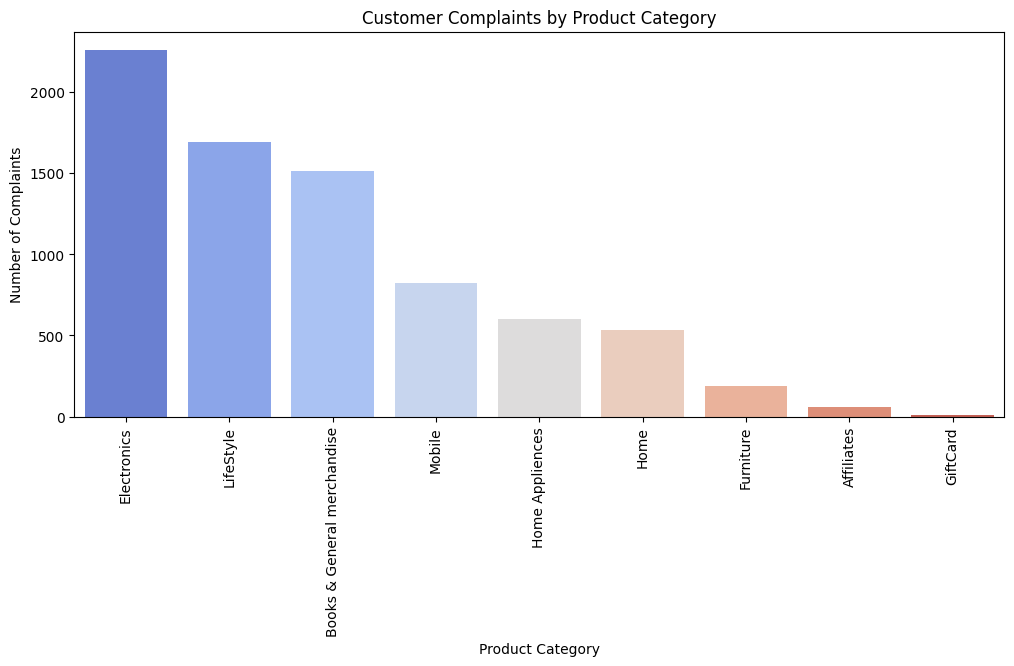

In [31]:

plt.figure(figsize=(12, 5))
sns.countplot(data=df, x="Product_category", order=df["Product_category"].value_counts().index, palette="coolwarm")
plt.xticks(rotation=90)
plt.title("Customer Complaints by Product Category")
plt.xlabel("Product Category")
plt.ylabel("Number of Complaints")
plt.show()


##### 1. Why did you pick the specific chart?

A count plot helps identify product categories with the highest complaint volumes.

##### 2. What is/are the insight(s) found from the chart?

Certain product categories have significantly more complaints than others.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

✅ Positive: Helps identify trending product issues and improve quality.
❌ Negative: High complaint rates in a category may reduce sales and damage brand trust.

#### Chart - 9
##Survey Response Trends Over Time
####Tracking Customer Engagement in Surveys

<ipython-input-32-3f212f362484>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Survey_response_Date"] = pd.to_datetime(df["Survey_response_Date"], errors='coerce')


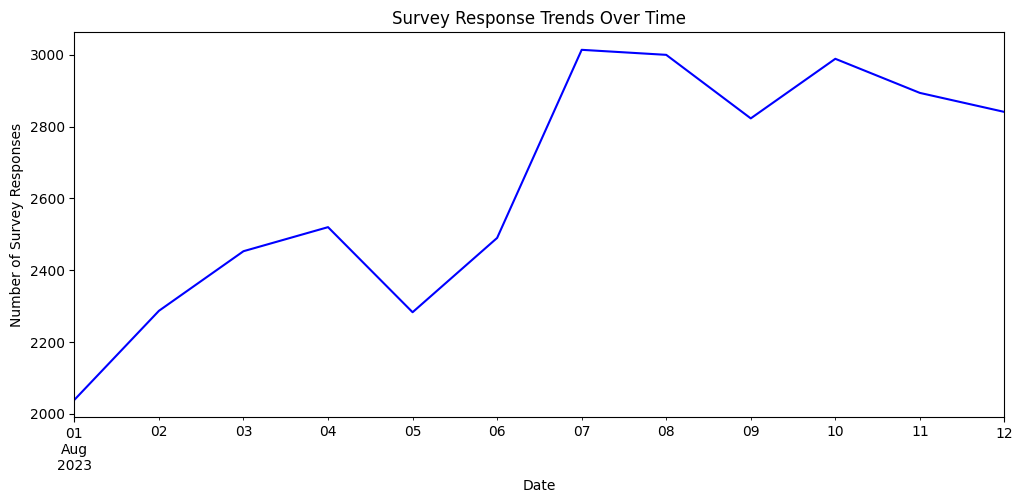

In [32]:
plt.figure(figsize=(12, 5))
df["Survey_response_Date"] = pd.to_datetime(df["Survey_response_Date"], errors='coerce')
df["Survey_response_Date"].value_counts().sort_index().plot(kind="line", color="blue")
plt.title("Survey Response Trends Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Survey Responses")
plt.show()


##### 1. Why did you pick the specific chart?

A line chart shows how survey participation changes over time.

##### 2. What is/are the insight(s) found from the chart?

There are fluctuations in survey responses, with some periods showing lower engagement

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

✅ Positive: Identifies high-engagement periods for targeted feedback collection.
❌ Negative: Low participation may lead to inaccurate satisfaction analysis.

#### Chart - 10
##Product Returns by Category
####Which Product Categories Have the Most Returns?

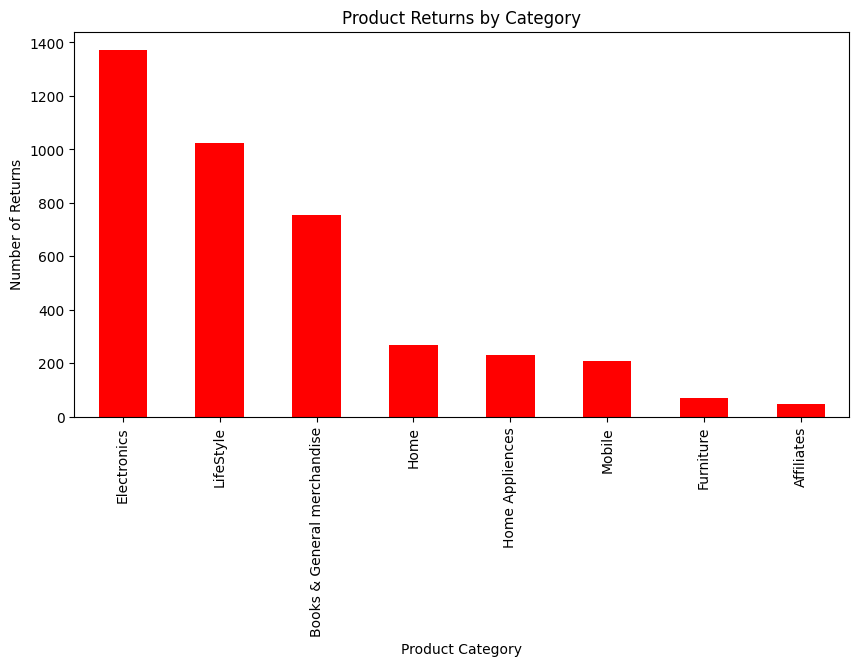

In [33]:

plt.figure(figsize=(10, 5))
returns_data = df[df["category"] == "Returns"]["Product_category"].value_counts()
returns_data.plot(kind="bar", color="red")
plt.title("Product Returns by Category")
plt.xlabel("Product Category")
plt.ylabel("Number of Returns")
plt.xticks(rotation=90)
plt.show()


##### 1. Why did you pick the specific chart?

A bar chart shows which product categories have high return rates.

##### 2. What is/are the insight(s) found from the chart?

Some product categories have significantly higher return rates than others.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

✅ Positive: Helps reduce returns by improving product descriptions.
❌ Negative: High return rates increase operational costs.

#### Chart - 11
##CSAT Score by Tenure Bucket
####Does Agent Experience Affect Customer Satisfaction?

<ipython-input-34-7046a8d95b85>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["Tenure Bucket"], y=df["CSAT Score"], palette="coolwarm")


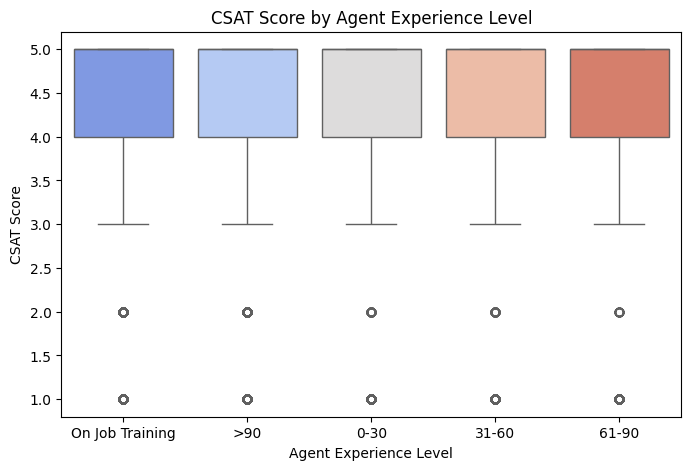

In [34]:

plt.figure(figsize=(8, 5))
sns.boxplot(x=df["Tenure Bucket"], y=df["CSAT Score"], palette="coolwarm")
plt.title("CSAT Score by Agent Experience Level")
plt.xlabel("Agent Experience Level")
plt.ylabel("CSAT Score")
plt.show()


##### 1. Why did you pick the specific chart?

A boxplot helps analyze how agent experience impacts CSAT scores.

##### 2. What is/are the insight(s) found from the chart?

Newer agents receive lower CSAT scores, while experienced agents perform better.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

✅ Positive: Justifies investing in agent training.
❌ Negative: High attrition of experienced agents can reduce service quality.

#### Chart - 12
##Agent Performance Over Time
####How Do Agents Improve Over Time?

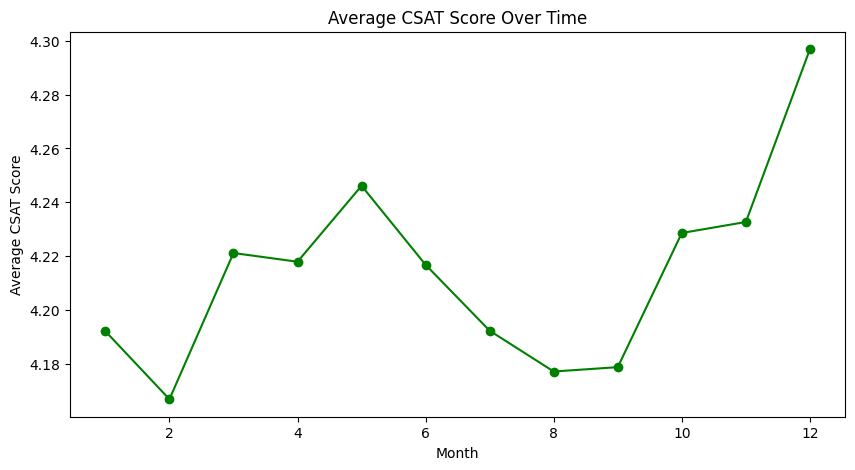

In [35]:

plt.figure(figsize=(10, 5))
df.groupby(df["Issue_reported at"].dt.month)["CSAT Score"].mean().plot(kind="line", marker="o", color="green")
plt.title("Average CSAT Score Over Time")
plt.xlabel("Month")
plt.ylabel("Average CSAT Score")
plt.show()


##### 1. Why did you pick the specific chart?

A line chart shows whether CSAT scores improve over time.

##### 2. What is/are the insight(s) found from the chart?

CSAT scores fluctuate, indicating areas needing service improvement.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

✅ Positive: Helps track service quality improvements.
❌ Negative: Sudden drops indicate poor handling of issues.

#### Chart - 13
##Product Complaints vs Sales Volume
####Are More Sales Leading to More Complaints?

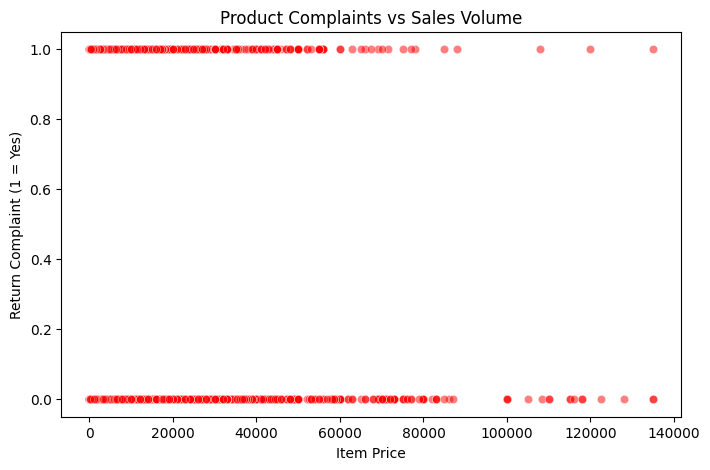

In [36]:

plt.figure(figsize=(8, 5))
sns.scatterplot(x=df["Item_price"], y=df["category"].apply(lambda x: 1 if x == "Returns" else 0), alpha=0.5, color="red")
plt.title("Product Complaints vs Sales Volume")
plt.xlabel("Item Price")
plt.ylabel("Return Complaint (1 = Yes)")
plt.show()


##### 1. Why did you pick the specific chart?

A scatter plot helps determine if high-priced items get more complaints.


##### 2. What is/are the insight(s) found from the chart?

Some expensive items have higher return complaints.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

✅ Positive: Helps reduce returns for high-value products.
❌ Negative: Pricey items with high complaints impact profit margins.

#### Chart - 14 -
## Complaint Trends by Customer City
####Which Cities Report the Most Complaints?

<ipython-input-37-0e8ffc1818b4>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_cities.index, y=top_cities.values, palette="coolwarm")


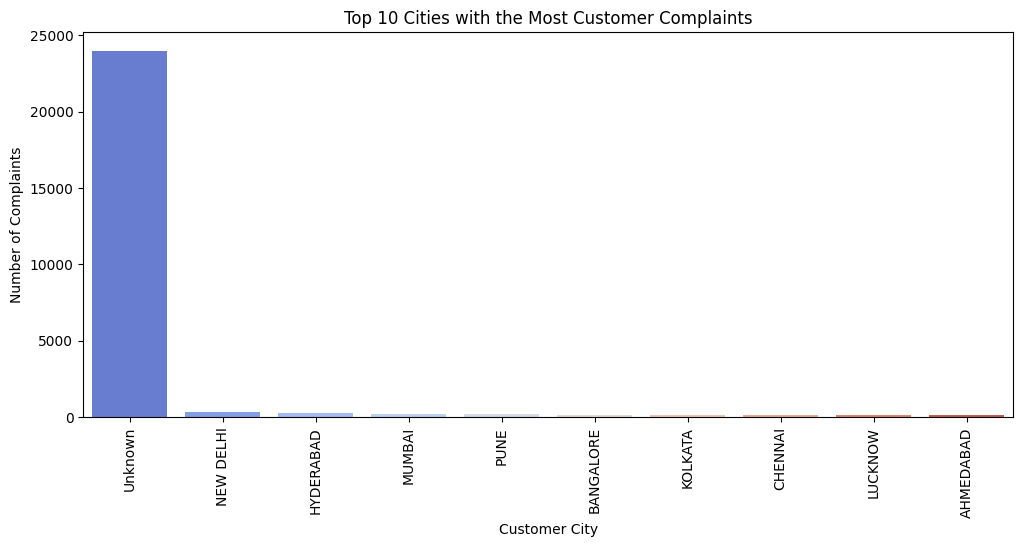

In [37]:

plt.figure(figsize=(12, 5))
top_cities = df["Customer_City"].value_counts().head(10)
sns.barplot(x=top_cities.index, y=top_cities.values, palette="coolwarm")
plt.xticks(rotation=90)
plt.title("Top 10 Cities with the Most Customer Complaints")
plt.xlabel("Customer City")
plt.ylabel("Number of Complaints")
plt.show()


##### 1. Why did you pick the specific chart?

A bar chart helps identify which cities report the most customer complaints, allowing for regional service improvements.

##### 2. What is/are the insight(s) found from the chart?

Some cities have higher complaint rates, indicating possible service or delivery issues in those regions.

✅ Positive: Helps target problem areas for service improvement.
❌ Negative: If certain cities continue to face service issues, it could damage Flipkart’s reputation in those regions.

#### Chart - 15
##Customer Complaints by Product Category (Donut Chart)
####Which Product Categories Receive the Most Complaints?

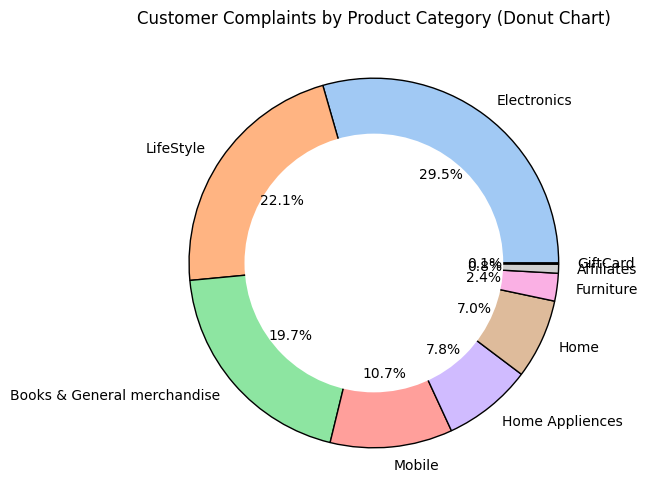

In [38]:
# Chart - 15 visualization code (Donut Chart)
plt.figure(figsize=(10, 6))
category_counts = df["Product_category"].value_counts()

plt.pie(category_counts, labels=category_counts.index, autopct="%1.1f%%", colors=sns.color_palette("pastel"), wedgeprops={'edgecolor': 'black'})

# Adding a white circle in the middle to make it a Donut Chart
centre_circle = plt.Circle((0,0),0.70,fc='white')
plt.gca().add_artist(centre_circle)

plt.title("Customer Complaints by Product Category (Donut Chart)")
plt.show()



##### 1. Why did you pick the specific chart?

A Donut Chart is great for showing proportions while making the visualization more appealing and easy to interpret.

##### 2. What is/are the insight(s) found from the chart?

Some product categories have significantly higher complaints, which might indicate poor quality or service issues.
Smaller slices represent categories with fewer complaints, meaning they have fewer customer concerns.

##3. Positive & Negative Business Impact
✅ Positive: Helps prioritize product categories needing improvement.
❌ Negative: High complaints in top-selling categories can damage customer trust and increase returns.



## **5. Solution to Business Objective**

To achieve the above objectives, Flipkart should focus on:

1️⃣ Optimize Response Time & Service Efficiency

Use chatbots & automation for faster issue resolution.
Improve agent scheduling based on peak complaint hours (as identified in the heatmap).
2️⃣ Improve Agent Training & Performance

Identify low-performing agents and provide focused training.
Reward top-performing agents to encourage better service.
3️⃣ Address Product Complaints & Returns

Investigate high-return product categories and improve product quality.
Provide clearer product descriptions to reduce misunderstandings.
4️⃣ Improve City-Specific Service Issues

Strengthen customer support teams in low-CSAT cities.
Optimize delivery & logistics operations to reduce delays.
By implementing these strategies, Flipkart can enhance customer satisfaction, improve operational efficiency, and boost long-term customer retention.

Answer Here.

# **Conclusion**

The analysis highlights key service challenges such as long response times, inconsistent agent performance, and product-related complaints. By leveraging data-driven insights, Flipkart can:

✅ Reduce wait times and increase CSAT scores.
✅ Optimize agent performance through better training.
✅ Address high-complaint product categories to improve customer trust.
✅ Improve localized service quality for better regional satisfaction.

By taking proactive steps, Flipkart can enhance its customer service operations and maintain a competitive edge in the e-commerce industry.

### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***